In [1]:
import sys
sys.path.append("..")
from evaluation.generated_dataset import GeneratedDataset

/home/kna/.cache/pypoetry/virtualenvs/wyckofftransformer-FeCwefly-py3.12/lib/python3.12/site-packages/matminer/utils/data.py:326: UserWarning: MagpieData(impute_nan=False):
In a future release, impute_nan will be set to True by default.
                    This means that features that are missing or are NaNs for elements
                    from the data source will be replaced by the average of that value
                    over the available elements.
                    This avoids NaNs after featurization that are often replaced by
                    dataset-dependent averages.
  warnings.warn(f"{self.__class__.__name__}(impute_nan=False):\n" + IMPUTE_NAN_WARNING)


In [2]:
diffcsp = GeneratedDataset.from_cache(("DiffCSP",))

In [12]:
asymmetric = diffcsp.data[diffcsp.data.group == 1]

In [23]:
from pymatgen.core import Structure, DummySpecies
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
import pandas as pd

dummy_structures = [Structure(s.lattice, [DummySpecies()] * len(s), s.frac_coords) for s in asymmetric.structure]

space_groups = [SpacegroupAnalyzer(s, symprec=0.1).get_space_group_number() for s in dummy_structures]

new_dataset = pd.DataFrame({
    "structure": dummy_structures,
    "space_group": space_groups,
})


spglib: ssm_get_exact_positions failed.
spglib: get_bravais_exact_positions_and_lattice failed.


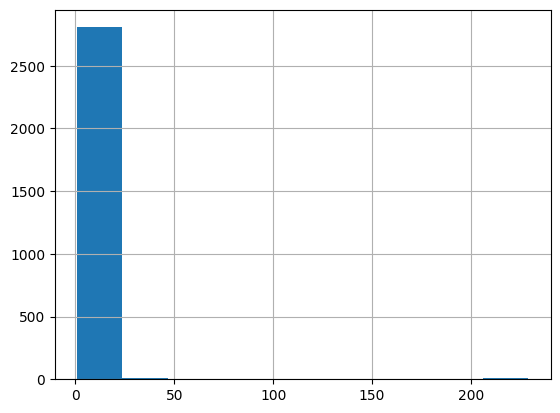

In [24]:
new_dataset.space_group.hist();